<a href="https://colab.research.google.com/github/Oussamaharbali/Portfolio/blob/main/OML3_tutoriel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<span style = "float:left"><img src = "https://upload.wikimedia.org/wikipedia/fr/c/c6/Université_de_Poitiers_%28logo_2012%29.png" title = "logo UP" alt = "logo UP" width = "200"></span><span style = "float:right" ></span><div style = "text-align:center">C. VERGNERIE - IUT d'Angoulême - OML 3
    <br><br>
    <b><font size="+3">OML3 - tutoriel</font></b>
</div>

___
___
## I - Représentation graphique de fonctions définies par morceaux avec Python + sympy

In [ ]:
from sympy import *
x,y,t=symbols('x,y,t', real=True)
i,k,n=symbols('i,k,n', integer=True, positive=True)
#z=Symbol('z', imaginary=True)
#f,g,h=symbols('f,g,h', cls=Function)

___
### I.1 Fonction Echelon-Unité (ou fonction de Heaviside)

Pour définir la fonction échelon-unité, nous pouvons le faire à l'aide de la fonction Heaviside déjà définie dans la bibliothèque sympy.

In [ ]:
def U(t):
    return Heaviside(t)

Pour représenter une fonction rapidement, il suffit d'écrire :

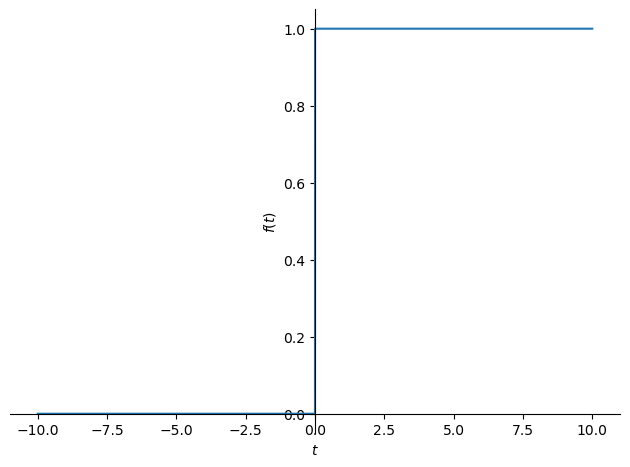

In [ ]:
plot(U(t))

Pour définir une nouvelle fonction à l'aide d'une fonction déjà définie, il sufit de procéder ainsi :

In [ ]:
def f(t):
    return t*U(t)+(1-t)*U(t-1)

Pour les représentations graphiques, on peut ajouter des arguments, les plus utiles sont :
* (t, xmin, xmax) permet de préciser la variable à utiliser pour un dessin et les bornes pour lesquelles on doit limiter la représentation graphique.
* xlim=(xmin, xmax) permet de définir les bornes horizontales de la fenêtre graphique.
* ylim=(ymin, ymax) permet de définir les bornes verticales de la fenêtre graphique.

Regardez ci-dessous les différentes représentations en fonction des paramètres entrés :

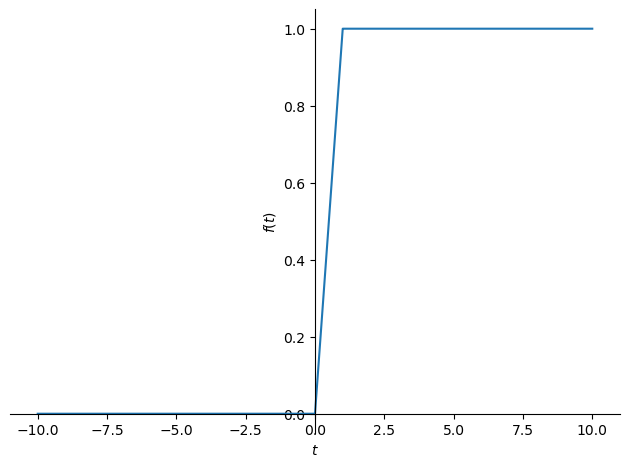

In [ ]:
plot(f(t))

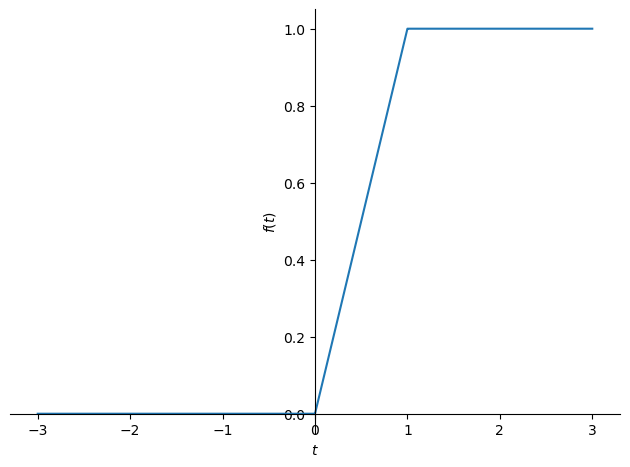

In [ ]:
plot(f(t),(t,-3,3))

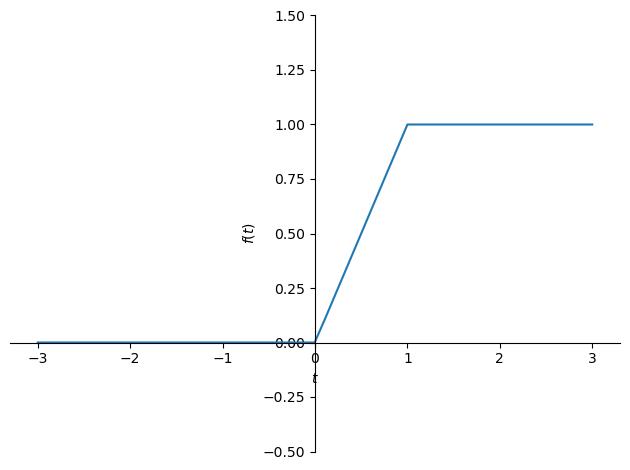

In [ ]:
plot(f(t), (t,-3,3), ylim=(-0.5,1.5))

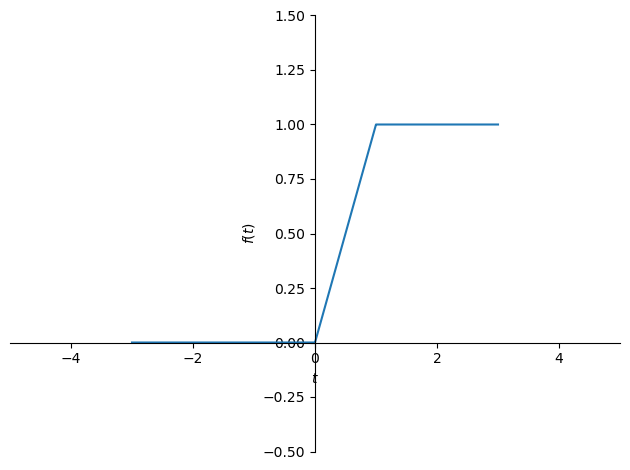

In [ ]:
plot(f(t), (t,-3,3), xlim=(-5,5), ylim=(-0.5,1.5))

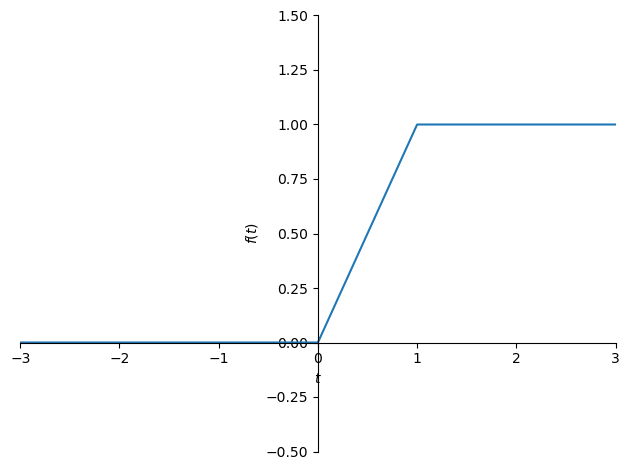

In [ ]:
plot(f(t), xlim=(-3,3), ylim=(-0.5,1.5))

___
### I.2 Fonction définie par morceaux
On peut définir une fonction par morceaux à l'aide de la fonction Piecewise de sympy et on précisant ensuite

In [ ]:
def Rect2(t):
    return Piecewise((0, t < -1), (1, t <= 1), (0, t>1))

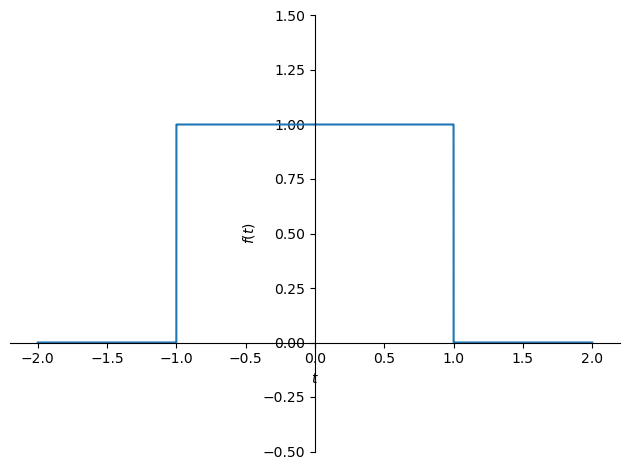

In [ ]:
plot(Rect2(t),(t,-2,2),ylim=(-0.5,1.5))

___
### I.3 Représentations graphiques dynamiques
On peut créer un dessin dynamique qui permet de visualiser l'effet des variations d'un paramètre. Prenons l'exemple de la fonction $\text{Rect}_{\tau}$ définie par : $\text{Rect}_{\tau}(t) = \begin{cases}
1 \text{ si } -\dfrac{\tau}{2} \leq t \leq \dfrac{\tau}{2} \\
0 \text{ sinon}
\end{cases}$

Nous allons pour cela devoir définir une fonction Python de deux variables : tau et t

In [ ]:
def rec_tau(tau,t):
    return Piecewise((0, t < -tau/2), (1, t <= tau/2), (0, t>tau/2))

Nous allons maintenant pouvoir définir une représentation dynamique avec un cureseur que nous pourrons faire varier et voir comment la représentation graphique évolue.

In [ ]:
from ipywidgets import *

%matplotlib inline
def plot_func(tau):
    plot(rec_tau(tau,t),
         xlim=(-8,8),
         ylim=(-0.5,1.5),
         size=(14,6)
        )

interact(plot_func,
        tau = FloatSlider(value=2,min=1,max=15.0,step=0.5),
        )


interactive(children=(FloatSlider(value=2.0, description='tau', max=15.0, min=1.0, step=0.5), Output()), _dom_…

<function __main__.plot_func(tau)>

*Remarque* : les dessins dynamiques ne sont pas exportés en html... Je vous représente ci-dessous ce que vous devez obtenir pour $\tau=2$, il y a un curseur modifiable que vous pouvez faire varier pour obtenir la représentation graphique de $Rect_\tau$ pour différentes valeurs de $\tau$ variant de 1 à 15 par pas de 0,5.

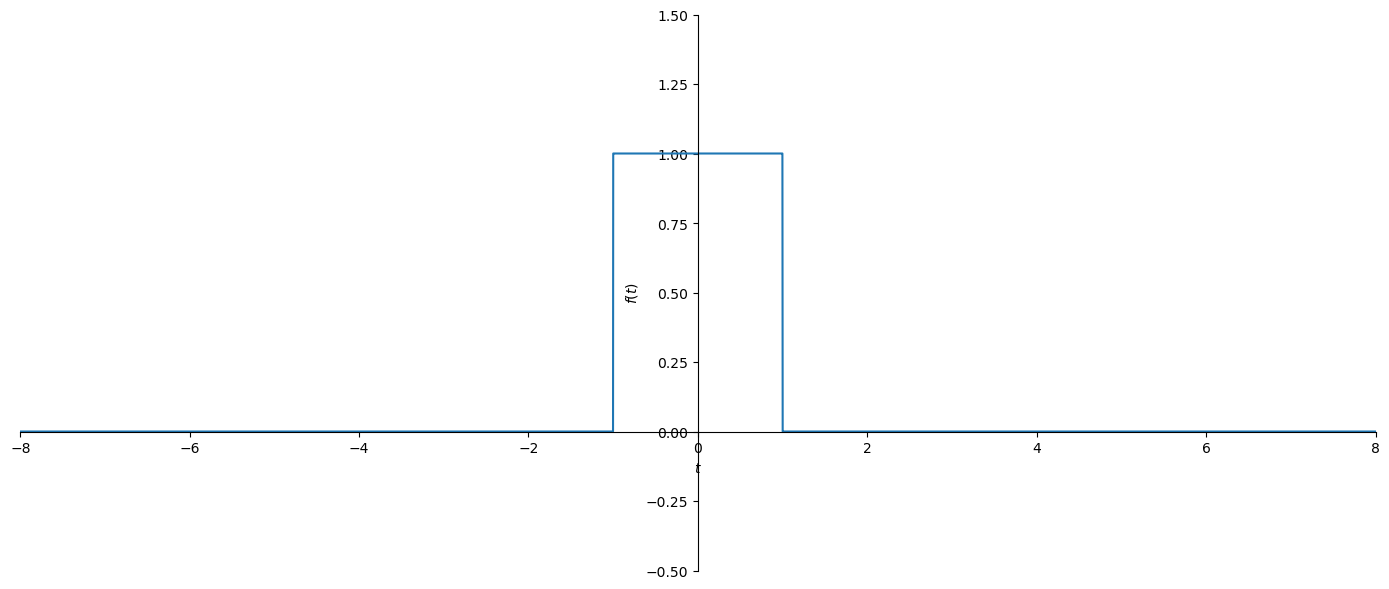

In [ ]:
plot(rec_tau(2,t),
         xlim=(-8,8),
         ylim=(-0.5,1.5),
         size=(14,6)
        )

## II - Calculer des sommes avec Python + sympy

Soit à calculer la somme : $$ \displaystyle\sum_{i=-3}^{2} i^{3} = (-3)^{3} + (-2)^{3} + (-1)^{3} + 0^{3} + 1^{3} + 2^{3}$$
Pour obtenir le résultat de cette somme, il suffit de rentrer le code suivant :

In [ ]:
summation(i**3 , (i, -3, 2))

-27

Si on veut faire la somme de fonctions, et que l'on veut par exemple calculer :

$F(t) = \sum_{i=0}^{N} cos(t*i)$

In [ ]:
N = Symbol('N', integer=True, positive=True) #On définit le nouveau symbole à utiliser

# On définit la fonction F
def F(t):
    return summation(cos(t*i) , (i, 0, N))

F(t)

Sum(cos(i*t), (i, 0, N))

On peut alors faire des calculs avec cette nouvelle et la représenter si on en a envie. Imaginons que l'on veuille représenter cette fonction sur l'intervalle $\left[-3\pi ; 3\pi\right]$ et pour une valeur de N valant 3 :

In [ ]:
N=3
F(t)

cos(t) + cos(2*t) + cos(3*t) + 1

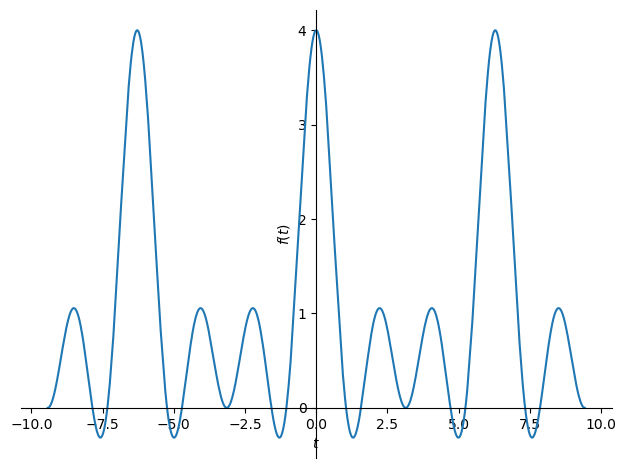

In [ ]:
plot(F(t) , (t, -3*pi, 3*pi))

Si on veut «effacer» le contenu de la variable N et que l'on veut revenir à l'expression générale :

In [ ]:
N = Symbol('N', integer=True, positive=True)
F(t)

Sum(cos(i*t), (i, 0, N))

Si on veut voir ce qu'il se passe lorsque la valeur de N varie, il suffit de rendre le graphique dynamique

In [ ]:
%matplotlib inline

def Fbis(N,t):
    return summation(cos(t*i) , (i, 0, N))

def plot_fonction_F(N):
    plot(Fbis(N,t),
         (t, -3*pi, 3*pi),
         size=(14,6)
        )

interact(plot_fonction_F,
        N = IntSlider(value=3,min=1,max=25,step=1),
        )



interactive(children=(IntSlider(value=3, description='N', max=25, min=1), Output()), _dom_classes=('widget-int…

<function __main__.plot_fonction_F(N)>

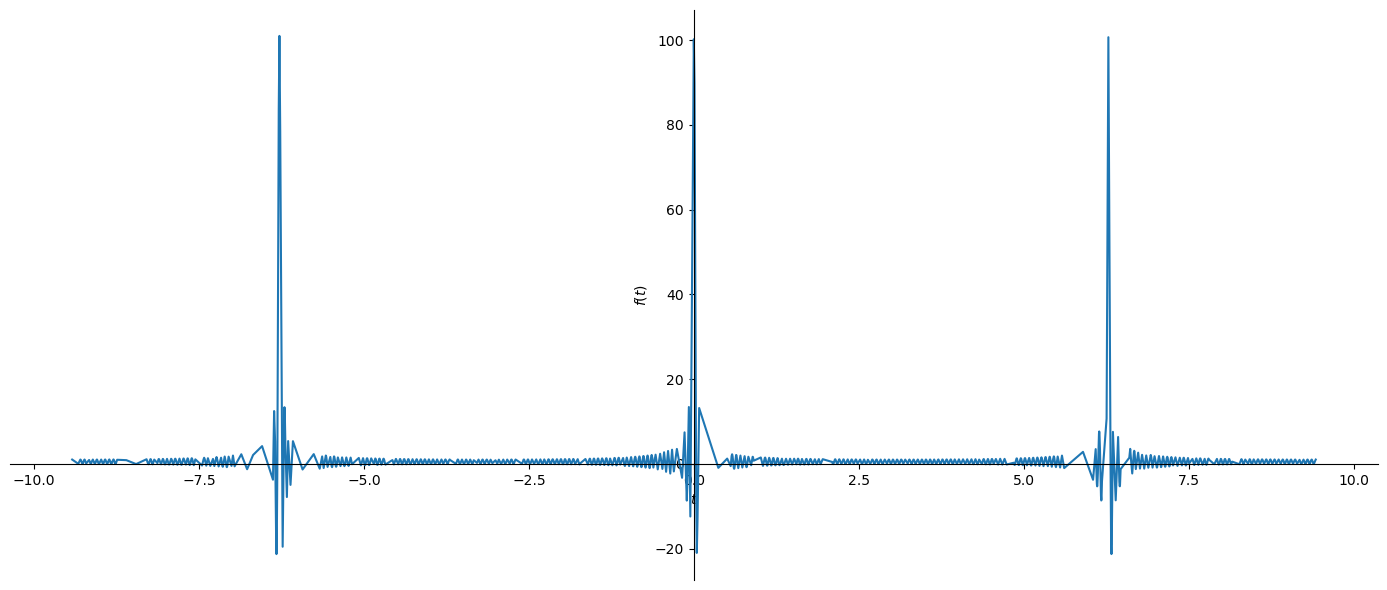

In [ ]:
plot_fonction_F(100)